In [1]:
import os
import sys

# run locally without install asynfed package
root = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))
sys.path.append(root)

In [2]:
import tensorflow as tf

2023-06-16 13:58:58.724615: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-16 13:58:58.796537: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-16 13:58:58.798059: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-16 13:58:59.952712: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
from asynfed.client.frameworks.tensorflow.tensorflow_framework import TensorflowFramework
from VGG16 import VGG16

In [4]:
tf.config.list_physical_devices('GPU')

2023-06-16 13:59:02.059652: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-16 13:59:02.060436: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


[]

In [5]:
if tf.config.list_physical_devices('GPU'):
    tf.config.set_visible_devices(tf.config.list_physical_devices('GPU')[0], 'GPU')
else:
    print("There is no gpu or your tensorflow is not built in with gpu support")

There is no gpu or your tensorflow is not built in with gpu support


In [6]:
from data_preprocessing import *

/home/vtn_ubuntu/miniconda3/envs/asynfed/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [7]:
data_path = "../../data/cifar_data/chunks/chunk_1.pickle"
batch_size = 128

In [8]:
train_ds, test_ds, data_size = load_training_dataset(train_dataset_path= data_path, batch_size= batch_size)


In [9]:
data_size, batch_size, len(train_ds)

(8823, 128, 63)

tf.Tensor([0.41568627 0.4627451  0.34509804], shape=(3,), dtype=float64)


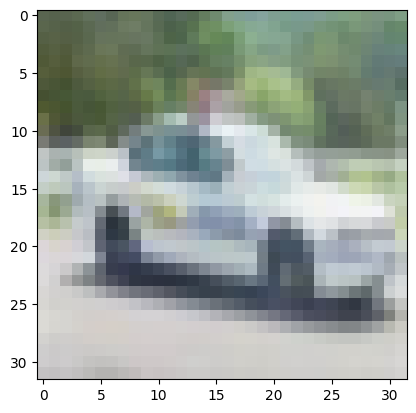

In [12]:
import matplotlib.pyplot as plt
for images, labels in train_ds:
    i = 50
    image = images[i]
    x, y = 3, 5
    print(image[x, y])
    plt.imshow(image)
    break

In [13]:
vgg_model = VGG16()
model = TensorflowFramework(vgg_model)

# training without augmented data

EPOCHS = 5

for epoch in range(EPOCHS):

  for images, labels in train_ds:
    train_acc, train_loss = model.fit(images, labels)

  for test_images, test_labels in test_ds:
    test_acc, test_loss = model.evaluate(test_images, test_labels)

  print(
    f'Epoch {epoch + 1}, '
    f'Accuracy: {train_acc * 100}, '
    f'Loss: {train_loss}, '
    f'Test Accuracy: {test_acc * 100}'
    f'Test Loss: {test_loss}, '
  )

/home/vtn_ubuntu/miniconda3/envs/asynfed/lib/python3.9/site-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


KeyboardInterrupt: 

In [ ]:
# augmented data
augmented_data = generate_augmented_data(tensor_ds= train_ds, augmentations_per_image= 10, batch_size= batch_size)
len(train_ds), len(augmented_data)

In [ ]:
vgg_model_1 = VGG16()
augmented_model = TensorflowFramework(vgg_model_1)

# training with augmented data

EPOCHS = 50

for epoch in range(EPOCHS):

  for images, labels in augmented_data:
    train_acc, train_loss = augmented_model.fit(images, labels)

  for test_images, test_labels in test_ds:
    test_acc, test_loss = augmented_model.evaluate(test_images, test_labels)

  print(
    f'Epoch {epoch + 1}, '
    f'Accuracy: {train_acc * 100}, '
    f'Loss: {train_loss}, '
    f'Test Accuracy: {test_acc * 100}'
    f'Test Loss: {test_loss}, '
  )